<a href="https://colab.research.google.com/github/Aryan-11-Kapoor/NetworkAnalysis/blob/main/PES2UG20CS069_NAM_ASSIGNMENT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TEAM MEMBERS

# 1. ARYAN KAPOOR      PES2UG20CS069
# 2. ATHARV ATHAVALE   PES2UG20CS074
# 3. AVIJIT PANDA      PES2UG20CS078

# IN THIS ASSIGNMENT WE HAVE MADE USE OF THE ADVENTURES OF SHERLOCK HOLMES 


# STEPS FOLLOWED :
# Importing all the necessary libraries
# Downloading package for sentence tokenization
# Making a list of characters
# Some preprocessing
# Creating the adjacency matrix based on if the characters appear in the proximity of three lines
# Creating the graph from the adjacency matrix
# Printing the nodes as tuples of ( nodes , their edge attributes)


In [ ]:
# IMPORTING ALL NECESSARY LIBRARIES 

import nltk
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize
from operator import itemgetter

In [ ]:
# DOWNLOADING 'PUNKT' PACKAGE - FOR SENTENCE TOKENIZATION

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

PART - A - MAKING LIST OF CHARACTERS 


In [ ]:
# LIST OF CHARACTERS 

characters=["Sherlock_Holmes","John_Watson","Inspector_Lestrade","Irene_Adler",  "James_Moriarty",  "Mary_Morstan",  "Charles_Augustus_Milverton",  "Jabez_Wilson",  "John_Clay",  "Hosmer_Angel",  "Count_von_Kramm",  "John_Turner",  "Godfrey_Staunton",  "Neville_St._Clair",  "Vincent_Spaulding",  "Windibank",  "Kate_Whitney",  "Alice_Turner",  "Godfrey_Norton"]

print(characters)

['Sherlock_Holmes', 'John_Watson', 'Inspector_Lestrade', 'Irene_Adler', 'James_Moriarty', 'Mary_Morstan', 'Charles_Augustus_Milverton', 'Jabez_Wilson', 'John_Clay', 'Hosmer_Angel', 'Count_von_Kramm', 'John_Turner', 'Godfrey_Staunton', 'Neville_St._Clair', 'Vincent_Spaulding', 'Windibank', 'Kate_Whitney', 'Alice_Turner', 'Godfrey_Norton']


In [7]:
# OPENING THE FILE 

with open('adventures_of_sherlock_holmes_relevant.txt', encoding='windows-1252') as file:
    f = file.read()

In [8]:
# PREPROCESSING 

f=str(f)
f = f.replace('Sherlock Holmes','Sherlock_Holmes')
f = f.replace('Holmes', 'Sherlock_Holmes')
f = f.replace('Watson','John_Watson')
f = f.replace('John Watson','John_Watson')
f = f.replace('Inspector Lestrade','Inspector_Lestrade')
f = f.replace('Lestrade','Inspector_Lestrade') 
f = f.replace('Irene Adler','Irene_Adler')
f = f.replace('Adler','Irene_Adler')
f = f.replace('James Moriarty','James_Moriarty')
f = f.replace('Moriarty',' James_Moriarty')

sentences = sent_tokenize(f)
print(len(sentences))

6928


In [9]:
sentences = f.split(".")

In [10]:
print(len(characters))

19


In [11]:
# MARKER FOR APPENDIX 
count = 0 
for sent in sentences:
    count += 1 
    if (sent == ' '):
        sentences.remove(sent)
    elif ("Appendix I" in sent):
        sentences = sentences[:count-1]
        break

In [12]:

# TO SHOW THAT THE APPENDICES AT THE END OF THE TEXT FILE HAVE BEEN REMOVED
sentences[-1]

'\n'

In [13]:
# CREATING A DATAFRAME 
char_df = pd.DataFrame(0, index=characters, columns=characters)
char_df.head()

,Sherlock_Holmes,John_Watson,Inspector_Lestrade,Irene_Adler,James_Moriarty,Mary_Morstan,Charles_Augustus_Milverton,Jabez_Wilson,John_Clay,Hosmer_Angel,Count_von_Kramm,John_Turner,Godfrey_Staunton,Neville_St._Clair,Vincent_Spaulding,Windibank,Kate_Whitney,Alice_Turner,Godfrey_Norton
Sherlock_Holmes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
John_Watson,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Inspector_Lestrade,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Irene_Adler,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
James_Moriarty,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In order to check to the appearance of characters and to calculate the adjacency matrix , we are making use of a check where we check if the two characters appear in 3 lines ie <br>
The line before a character name appears
<br> The line in which it appears <br>
The line after the character name appears. 
<br> This produces a better understanding than the Naive case.

In [14]:
index = 0
n = len(sentences)
for sentence in sentences:
    index += 1
    array = []
    if (index <= 1): lower_bound = 1
    else: lower_bound = index-1
    #slicing excludes upper_bound element
    if (index >= n-2): upper_bound = n 
    else: upper_bound = index+2
    
    #creating array with 3 lines from above and below sentence
    array = sentences[lower_bound:upper_bound]  
    array_chars = []
    for char in characters:
        for sent in array:
            if char in sent and char not in array_chars:
                array_chars.append(char)

    for char1 in characters:
        for char2 in characters:
            if (char1 != char2) and (char1 in sentence) and (char2 in array_chars):
                char_df[char1][char2] += 1
                char_df[char2][char1] += 1
char_df

,Sherlock_Holmes,John_Watson,Inspector_Lestrade,Irene_Adler,James_Moriarty,Mary_Morstan,Charles_Augustus_Milverton,Jabez_Wilson,John_Clay,Hosmer_Angel,Count_von_Kramm,John_Turner,Godfrey_Staunton,Neville_St._Clair,Vincent_Spaulding,Windibank,Kate_Whitney,Alice_Turner,Godfrey_Norton
Sherlock_Holmes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
John_Watson,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Inspector_Lestrade,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Irene_Adler,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
James_Moriarty,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Mary_Morstan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Charles_Augustus_Milverton,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Jabez_Wilson,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
John_Clay,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Hosmer_Angel,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


PART B - CREATING A SOCIAL GRAPH


In [15]:
# CREATE A NETWORK FROM THE ADJACENCY MATRIX

G = nx.Graph()
G = nx.from_pandas_adjacency(char_df)

In [16]:
# PRINTING THE NODES AND EDGES IN THE GRAPH 

print("Number of nodes in the graph:", len(G.nodes()))
print("Nodes:", G.nodes())
print()
print("Number of edges in the graph:", len(G.edges()))
print("Edges:", G.edges(data=True))

Number of nodes in the graph: 19
Nodes: ['Sherlock_Holmes', 'John_Watson', 'Inspector_Lestrade', 'Irene_Adler', 'James_Moriarty', 'Mary_Morstan', 'Charles_Augustus_Milverton', 'Jabez_Wilson', 'John_Clay', 'Hosmer_Angel', 'Count_von_Kramm', 'John_Turner', 'Godfrey_Staunton', 'Neville_St._Clair', 'Vincent_Spaulding', 'Windibank', 'Kate_Whitney', 'Alice_Turner', 'Godfrey_Norton']

Number of edges in the graph: 0
Edges: []


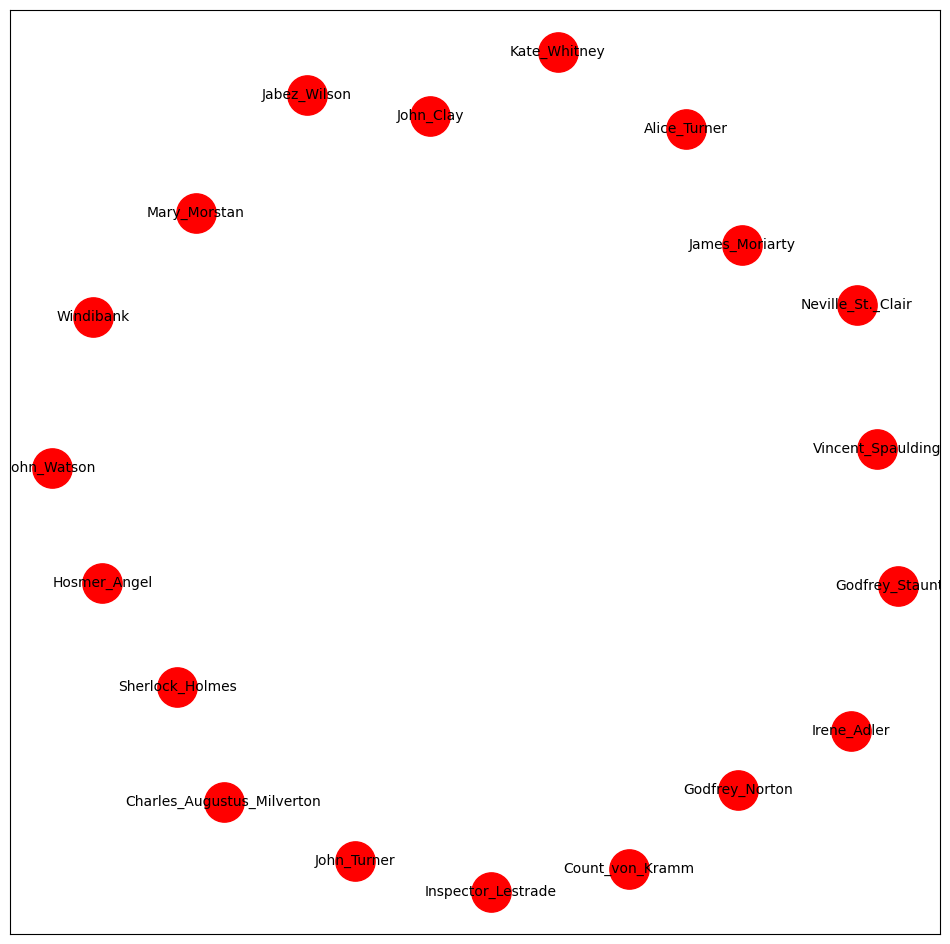

In [17]:
# PLOTTING THE GRAPH 

plt.figure(3, figsize=(12,12))
pos = nx.fruchterman_reingold_layout(G)

nx.draw_networkx(G, pos=pos, node_size = 800, font_size=10, node_color="red")
nx.draw_networkx_edges(G, pos=pos)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
plt.show()

In [18]:
# PRINTING NODES AS TUPLES OF NODES + EDGE ATTRIBUTES
list(G.edges(data=True))

[]

PART-C     CENTRALITY ANALYSIS

In [19]:
# DEGREE CENTRALITY
from operator import itemgetter
degc = nx.degree_centrality(G)
# let's list the scores
sorted(degc.items(), key=itemgetter(1), reverse=True)

[('Sherlock_Holmes', 0.0),
 ('John_Watson', 0.0),
 ('Inspector_Lestrade', 0.0),
 ('Irene_Adler', 0.0),
 ('James_Moriarty', 0.0),
 ('Mary_Morstan', 0.0),
 ('Charles_Augustus_Milverton', 0.0),
 ('Jabez_Wilson', 0.0),
 ('John_Clay', 0.0),
 ('Hosmer_Angel', 0.0),
 ('Count_von_Kramm', 0.0),
 ('John_Turner', 0.0),
 ('Godfrey_Staunton', 0.0),
 ('Neville_St._Clair', 0.0),
 ('Vincent_Spaulding', 0.0),
 ('Windibank', 0.0),
 ('Kate_Whitney', 0.0),
 ('Alice_Turner', 0.0),
 ('Godfrey_Norton', 0.0)]

In [20]:
# BETWEENESS CENTRALITY
betc = nx.betweenness_centrality(G)
sorted(betc.items(), key=itemgetter(1), reverse=True)

[('Sherlock_Holmes', 0.0),
 ('John_Watson', 0.0),
 ('Inspector_Lestrade', 0.0),
 ('Irene_Adler', 0.0),
 ('James_Moriarty', 0.0),
 ('Mary_Morstan', 0.0),
 ('Charles_Augustus_Milverton', 0.0),
 ('Jabez_Wilson', 0.0),
 ('John_Clay', 0.0),
 ('Hosmer_Angel', 0.0),
 ('Count_von_Kramm', 0.0),
 ('John_Turner', 0.0),
 ('Godfrey_Staunton', 0.0),
 ('Neville_St._Clair', 0.0),
 ('Vincent_Spaulding', 0.0),
 ('Windibank', 0.0),
 ('Kate_Whitney', 0.0),
 ('Alice_Turner', 0.0),
 ('Godfrey_Norton', 0.0)]

In [21]:
# CLOSENESS CENTRALITY
closc = nx.closeness_centrality(G)
sorted(closc.items(), key=itemgetter(1), reverse=True)

[('Sherlock_Holmes', 0.0),
 ('John_Watson', 0.0),
 ('Inspector_Lestrade', 0.0),
 ('Irene_Adler', 0.0),
 ('James_Moriarty', 0.0),
 ('Mary_Morstan', 0.0),
 ('Charles_Augustus_Milverton', 0.0),
 ('Jabez_Wilson', 0.0),
 ('John_Clay', 0.0),
 ('Hosmer_Angel', 0.0),
 ('Count_von_Kramm', 0.0),
 ('John_Turner', 0.0),
 ('Godfrey_Staunton', 0.0),
 ('Neville_St._Clair', 0.0),
 ('Vincent_Spaulding', 0.0),
 ('Windibank', 0.0),
 ('Kate_Whitney', 0.0),
 ('Alice_Turner', 0.0),
 ('Godfrey_Norton', 0.0)]

In [22]:
# PAGE RANK
print('\n sorted pagerank:\n')
pgr=nx.pagerank(G)
sorted(pgr.items(), key=itemgetter(1), reverse=True)


 sorted pagerank:



[('Sherlock_Holmes', 0.052631578947368404),
 ('John_Watson', 0.052631578947368404),
 ('Inspector_Lestrade', 0.052631578947368404),
 ('Irene_Adler', 0.052631578947368404),
 ('James_Moriarty', 0.052631578947368404),
 ('Mary_Morstan', 0.052631578947368404),
 ('Charles_Augustus_Milverton', 0.052631578947368404),
 ('Jabez_Wilson', 0.052631578947368404),
 ('John_Clay', 0.052631578947368404),
 ('Hosmer_Angel', 0.052631578947368404),
 ('Count_von_Kramm', 0.052631578947368404),
 ('John_Turner', 0.052631578947368404),
 ('Godfrey_Staunton', 0.052631578947368404),
 ('Neville_St._Clair', 0.052631578947368404),
 ('Vincent_Spaulding', 0.052631578947368404),
 ('Windibank', 0.052631578947368404),
 ('Kate_Whitney', 0.052631578947368404),
 ('Alice_Turner', 0.052631578947368404),
 ('Godfrey_Norton', 0.052631578947368404)]

PART - D. CLUSTERING COEFFICIENTS

In [23]:
# TRANSITIVITY 
print(nx.transitivity(G))

0


In [24]:
# GLOBAL CLUSTERING COEFFICIENT 
print(nx.average_clustering(G))

0.0


In [25]:
# LOCAL CLUSTERING COEFFICIENT
nx.clustering(G)

{'Sherlock_Holmes': 0,
 'John_Watson': 0,
 'Inspector_Lestrade': 0,
 'Irene_Adler': 0,
 'James_Moriarty': 0,
 'Mary_Morstan': 0,
 'Charles_Augustus_Milverton': 0,
 'Jabez_Wilson': 0,
 'John_Clay': 0,
 'Hosmer_Angel': 0,
 'Count_von_Kramm': 0,
 'John_Turner': 0,
 'Godfrey_Staunton': 0,
 'Neville_St._Clair': 0,
 'Vincent_Spaulding': 0,
 'Windibank': 0,
 'Kate_Whitney': 0,
 'Alice_Turner': 0,
 'Godfrey_Norton': 0}

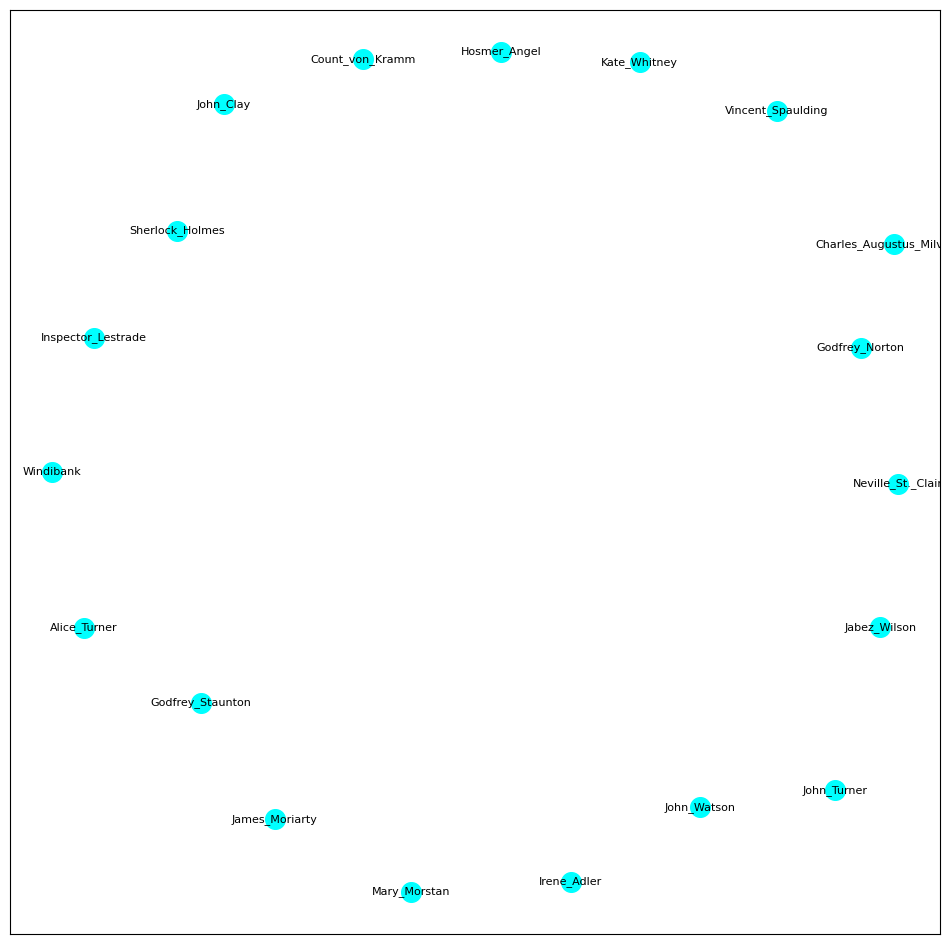

In [26]:
#DETECTING COMMUNITIES

#Clique Percolation Method

plt.figure(3, figsize=(12,12))
nx.draw_networkx(G,with_labels=True, node_size=200, font_size = 8, node_color='cyan')

In [28]:
# To search for all maximal cliques in a graph.
list(nx.find_cliques(G))  

[['John_Clay'],
 ['Sherlock_Holmes'],
 ['Kate_Whitney'],
 ['Windibank'],
 ['Inspector_Lestrade'],
 ['Hosmer_Angel'],
 ['Jabez_Wilson'],
 ['Neville_St._Clair'],
 ['Mary_Morstan'],
 ['John_Watson'],
 ['Vincent_Spaulding'],
 ['Count_von_Kramm'],
 ['Alice_Turner'],
 ['Godfrey_Staunton'],
 ['Irene_Adler'],
 ['Charles_Augustus_Milverton'],
 ['John_Turner'],
 ['Godfrey_Norton'],
 ['James_Moriarty']]

In [27]:
# Finds the maximal cliques and treats these as nodes. 
# The nodes are connected if they have common members in the original graph.
synthetic = nx.make_max_clique_graph(G)  
print(synthetic.edges())

[]


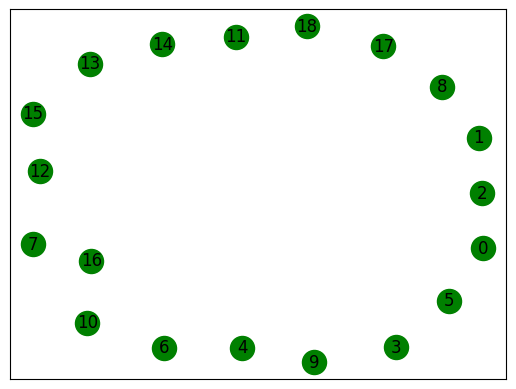

In [29]:
nx.draw_networkx(synthetic,node_color='green')

In [30]:
#K-clique Community

In [31]:
from networkx.algorithms.community import k_clique_communities  # find k-clique community using percolation method
c = list(k_clique_communities(G, 9))
print(c)

[]


In [32]:
print(len(list(c)))

0


PART-E - DEGREE DISTRIBUTION AND GENERATIVE MODEL

In [33]:
#DEGREE DISTRIBUTION AND GENERATIVE MODEL

In [34]:
N,K = G.order(), G.size()
avg_deg = float(K)/N
print ("Nodes: ", N)
print ("Edges: ", K)
print ("Average degree: ", avg_deg)

Nodes:  19
Edges:  0
Average degree:  0.0


In [35]:
# Degree distribution 

<ipython-input-36-a4c17c4da3c4>:19: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(1,max(degree_sequence)+1)
<ipython-input-36-a4c17c4da3c4>:19: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.ylim(1,max(degree_sequence)+1)


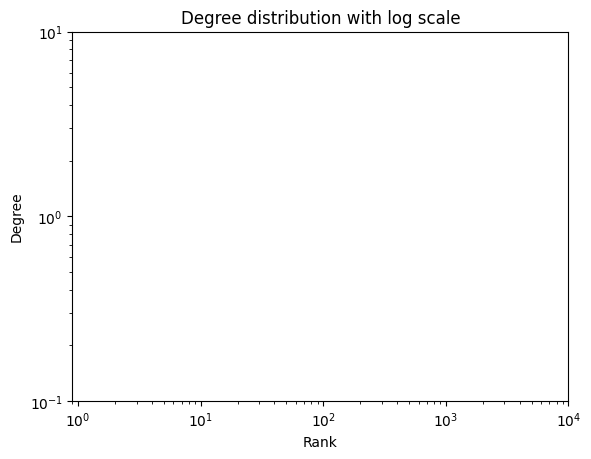

In [36]:
# loglog tells matplotlib to use log scales.
# The x values, range(1,10001), are the ranks, 
# and the degree_sequence are the y values.
# The String 'k.' means use black (k) dots (.)

degrees = G.degree()
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence

'''
Now we need to do some plotting. Plotting using matplotlib is a lot like 
plotting using MATLAB. Because the degree distribution of a BA graph is a 
power-law, we'd like to use a plot with log scales. Here is how we'd do it.

'''
plt.loglog(range(1,G.order()+1),degree_sequence,'k.')
plt.title("Degree distribution with log scale")
plt.xlabel('Rank')
plt.ylabel('Degree')
plt.ylim(1,max(degree_sequence)+1)
plt.xlim(.9,10001)
plt.savefig("degree-distribution.png")

In [37]:
#SIZE OF LARGEST COMPONENT

In [38]:
a = nx.is_connected(G)
s='\n Is a connected graph: ' +repr(a)
print (s)

no=len(list(nx.connected_components(G)))
s='\n no of connected components: ' +repr(no)
print (s)

#Gecum13ate a sorted list of connected components, largest first 
CoC=sorted(nx.connected_components(G), key = len, reverse=True)
for item in CoC:
    cclen=len(item)
    s= "\n Connected component length:" +repr(cclen)
    print (s)
    print ("\n Connected component :")
    print (item)


 Is a connected graph: False

 no of connected components: 19

 Connected component length:1

 Connected component :
{'Sherlock_Holmes'}

 Connected component length:1

 Connected component :
{'John_Watson'}

 Connected component length:1

 Connected component :
{'Inspector_Lestrade'}

 Connected component length:1

 Connected component :
{'Irene_Adler'}

 Connected component length:1

 Connected component :
{'James_Moriarty'}

 Connected component length:1

 Connected component :
{'Mary_Morstan'}

 Connected component length:1

 Connected component :
{'Charles_Augustus_Milverton'}

 Connected component length:1

 Connected component :
{'Jabez_Wilson'}

 Connected component length:1

 Connected component :
{'John_Clay'}

 Connected component length:1

 Connected component :
{'Hosmer_Angel'}

 Connected component length:1

 Connected component :
{'Count_von_Kramm'}

 Connected component length:1

 Connected component :
{'John_Turner'}

 Connected component length:1

 Connected componen

In [39]:
#AVERAGE SHORTEST PATH

In [40]:
#COMPARING WITH GENERATIVE MODELS TO COMPARE THE GRAPH WITH

In [41]:
nodes=G.number_of_nodes()
nodes

19

In [42]:
#calculate average degree to use with random graph models 

degree_list = list(nx.degree(G))
#print(degree_list)
no_nodes=len(degree_list)
total_degree=0
for node in degree_list[:5]:
    print("Node ", node[0], " : Degree is ", node[1])
    total_degree=total_degree+ node[1]
avg_degree= total_degree/no_nodes
avg_degree

Node  Sherlock_Holmes  : Degree is  0
Node  John_Watson  : Degree is  0
Node  Inspector_Lestrade  : Degree is  0
Node  Irene_Adler  : Degree is  0
Node  James_Moriarty  : Degree is  0


0.0

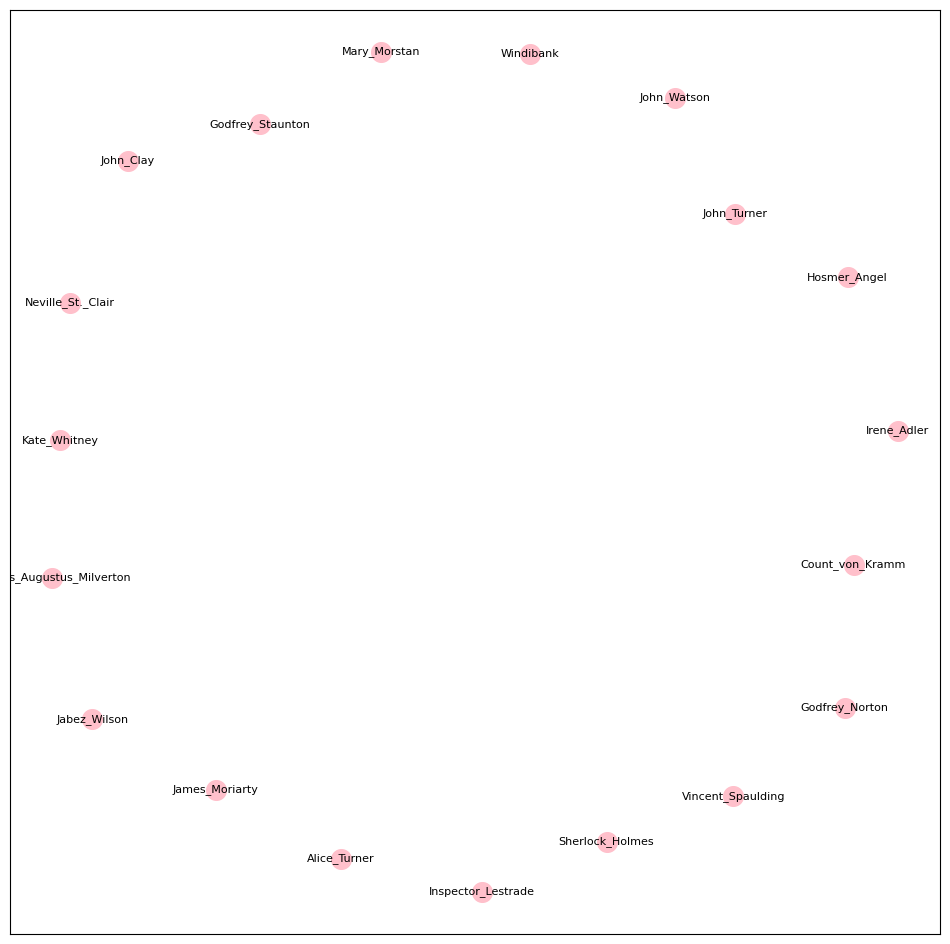

In [43]:
#Original graph
plt.figure(3, figsize=(12,12))
nx.draw_networkx(G,with_labels=True, node_size=200, font_size = 8, node_color='pink')

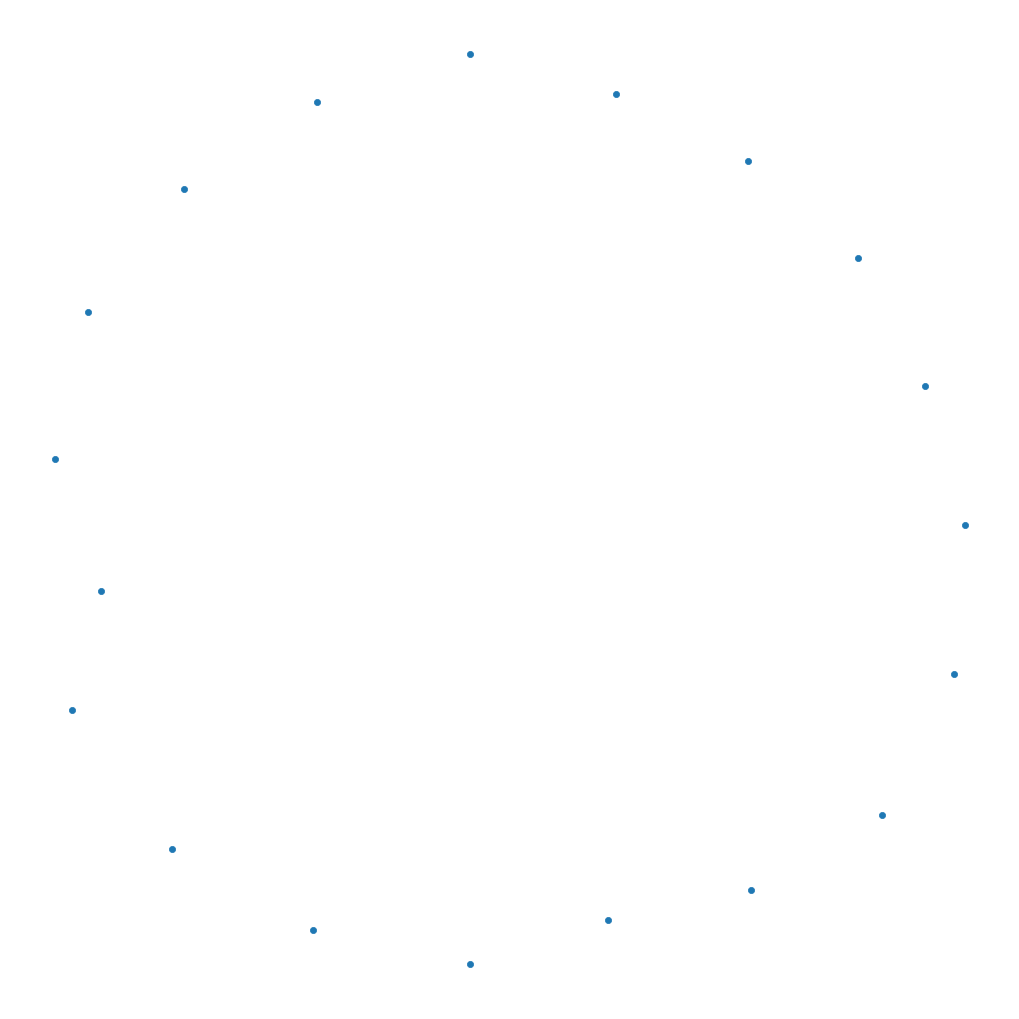

In [44]:
p=avg_degree/(no_nodes-1)
#G2 = nx.erdos_renyi_graph(no_nodes,p)  # same call 
G2 = nx.gnp_random_graph(no_nodes,p)
fig = plt.figure(figsize =(10 ,10))
nx.draw(G2, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5, arrows=True)
plt.show()

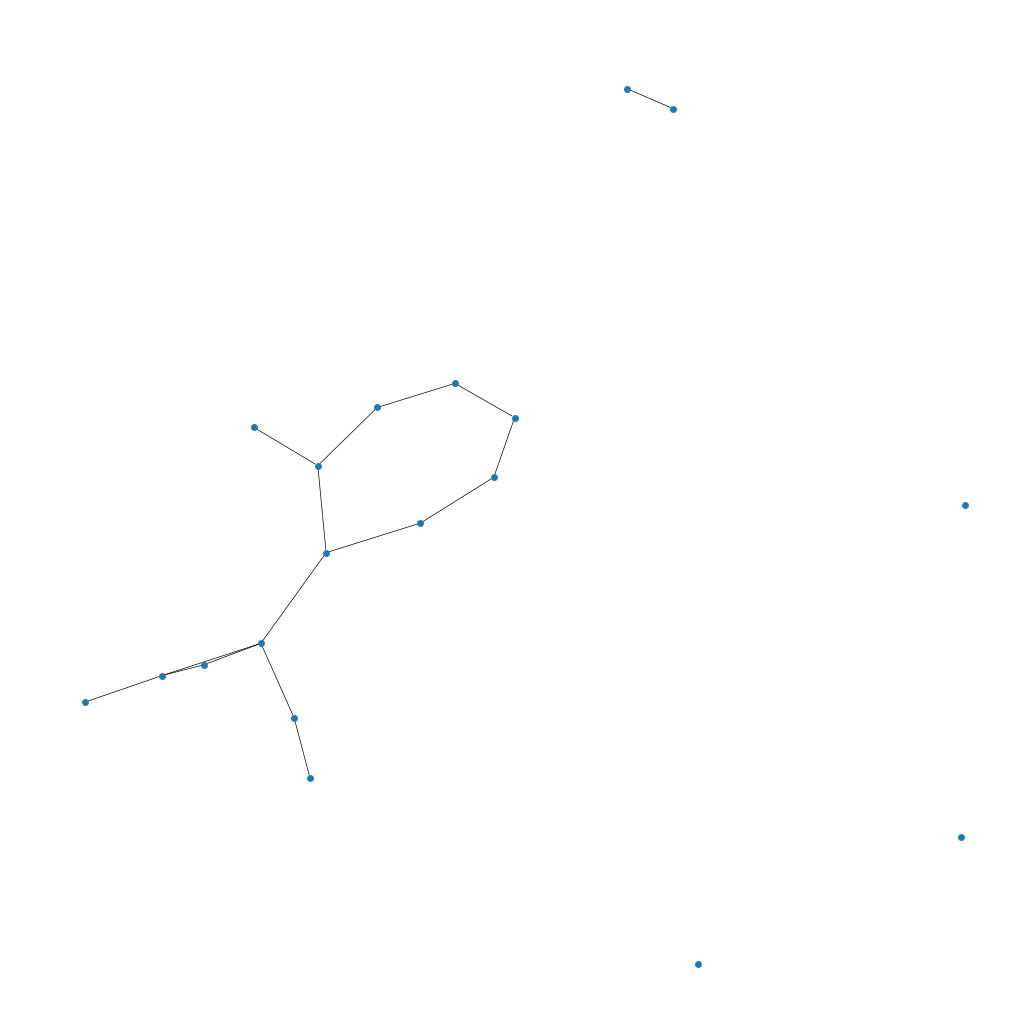

In [46]:
#Make random graph 
G2 = nx.gnp_random_graph(no_nodes,0.1)
#assuming probability for node creation 0.1 
fig = plt.figure(figsize =(10 ,10))
nx.draw(G2, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5, arrows=True)
plt.show()

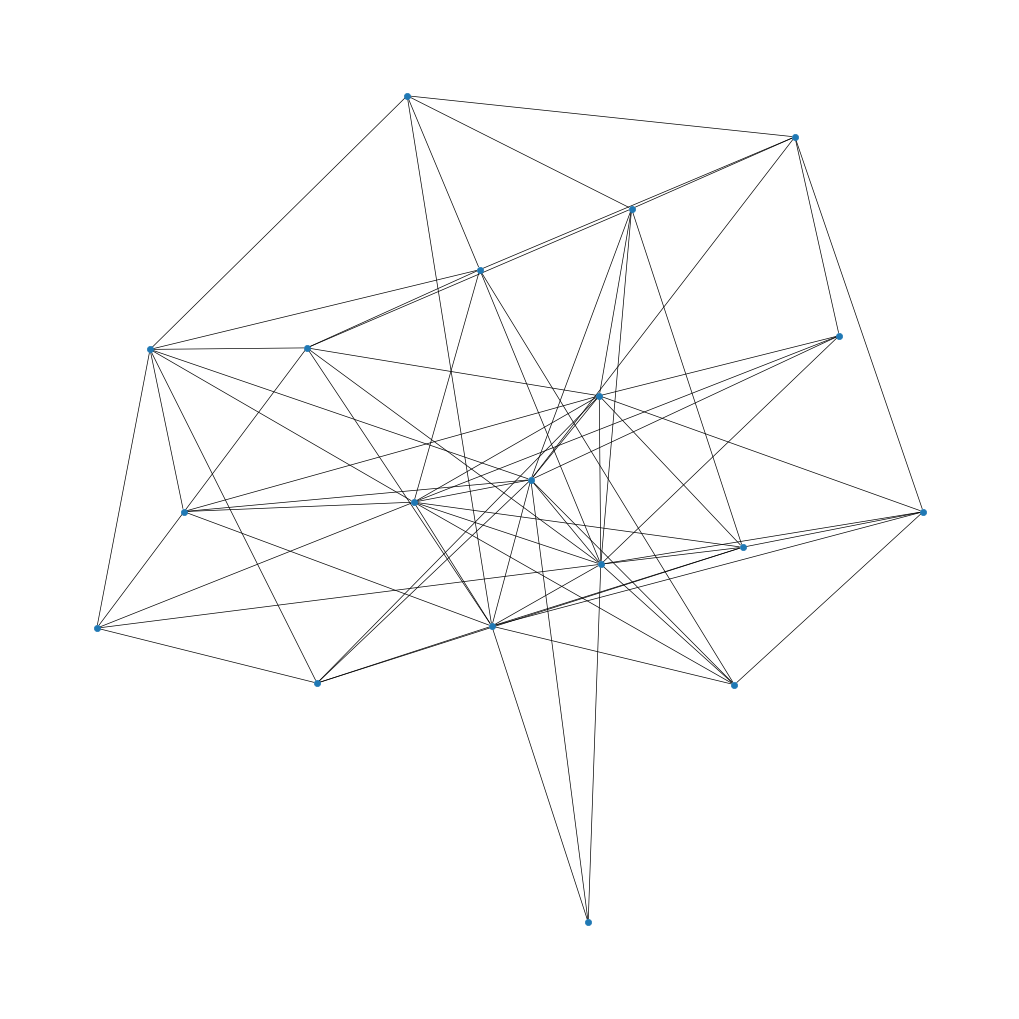

In [45]:
neighbours=5
H = nx.barabasi_albert_graph(no_nodes,neighbours)
fig = plt.figure(figsize =(10 ,10))
nx.draw(H, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5,arrows=True)
plt.show()

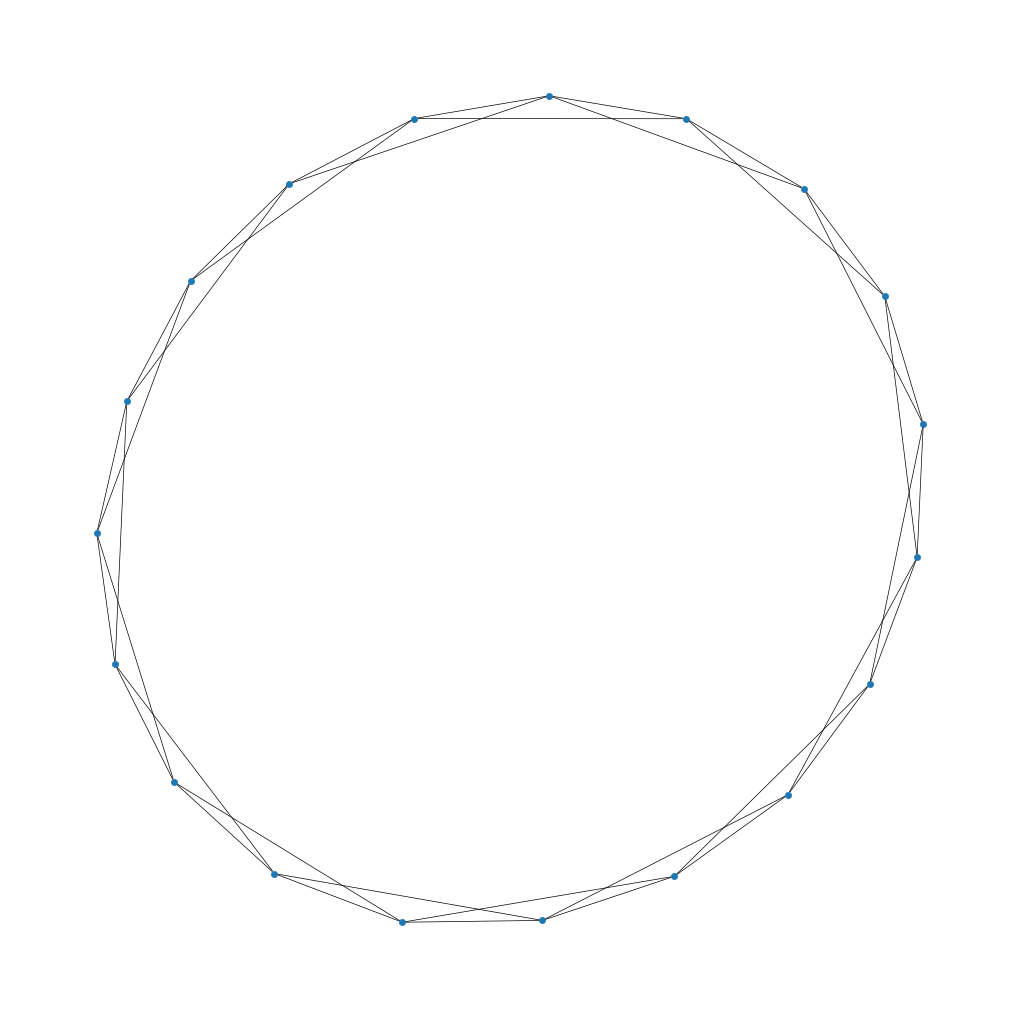

In [47]:
H = nx.newman_watts_strogatz_graph(no_nodes,neighbours,p)
fig = plt.figure(figsize =(10 ,10))

nx.draw(H, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5,arrows=True)
plt.show()

In [48]:
#F ANALYSIS - CHARACTER STUDY

In [49]:
#Comparing centrality values to determine the protagnoist
from operator import itemgetter
degc = nx.degree_centrality(G)
# let's list the scores
deg_list = sorted(degc.items(), key=itemgetter(1), reverse=True)
for i in range(5):
  print(deg_list[i])

('Sherlock_Holmes', 0.0)
('John_Watson', 0.0)
('Inspector_Lestrade', 0.0)
('Irene_Adler', 0.0)
('James_Moriarty', 0.0)


In [51]:
betc = nx.betweenness_centrality(G)
bet_list = sorted(betc.items(), key=itemgetter(1), reverse=True)
for i in range(5):
  print(bet_list[i])

('Sherlock_Holmes', 0.0)
('John_Watson', 0.0)
('Inspector_Lestrade', 0.0)
('Irene_Adler', 0.0)
('James_Moriarty', 0.0)


In [50]:
closc = nx.closeness_centrality(G)
clo_list = sorted(closc.items(), key=itemgetter(1), reverse=True)
for i in range(5):
  print(clo_list[i])

('Sherlock_Holmes', 0.0)
('John_Watson', 0.0)
('Inspector_Lestrade', 0.0)
('Irene_Adler', 0.0)
('James_Moriarty', 0.0)


In [ ]:
pgr=nx.pagerank(G)
pag_list = sorted(pgr.items(), key=itemgetter(1), reverse=True)
for i in range(5):
  print(pag_list[i])

In [52]:
#Centrality scatter plot 
def centrality_scatter(dict1,dict2,path="",ylab="",xlab="",title="",line=False):
    # Create figure and drawing axis
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(111)
    # Create items and extract centralities
    items1 = sorted(dict1.items())
    items2 = sorted(dict2.items())
    xdata=[b for a,b in items1]
    ydata=[b for a,b in items2]
    # Add each actor to the plot by ID
    for p in range(len(items1)):
        ax1.text(x=xdata[p], y=ydata[p],s=str(items1[p][0]), color="b")
        if line:
            # use NumPy to calculate the best fit
            slope, yint = plt.polyfit(xdata,ydata,1)
            xline = plt.xticks()[0]
            yline = map(lambda x: slope*x+yint,xline)
            ax1.plot(xline,yline,ls='--',color='b')
        # Set new x- and y-axis limits
    plt.xlim((0.0,max(xdata)+(.15*max(xdata))))
    plt.ylim((0.0,max(ydata)+(.15*max(ydata))))
    # Add labels and save
    ax1.set_title(title)
    ax1.set_xlabel(xlab)
    ax1.set_ylabel(ylab)
    plt.savefig(path)

In [53]:
cc=nx.closeness_centrality(G)
dc=nx.degree_centrality(G)
bc = nx.betweenness_centrality(G)
ec = nx.eigenvector_centrality(G,max_iter=1000)

sorted_dc=sorted(dc.items())
sorted_bc=sorted(bc.items())
sorted_cc=sorted(cc.items())
sorted_ec=sorted(ec.items())

#extract the centralities
deg_data=[y for x,y in sorted_dc]
close_data=[y for x,y in sorted_cc]
betw_data=[y for x,y in sorted_bc]
eig_data=[y for x,y in sorted_ec]

In [54]:
from scipy.stats.stats import pearsonr

r1=pearsonr(deg_data,betw_data)
s= "\n Pearson Correlation Coeff deg and betweenness: " + repr(r1)
print (s)

r2=pearsonr(deg_data,close_data)
s= "\n Pearson Correlation Coeff deg and closeness: " + repr(r2)
print (s)


r3=pearsonr(betw_data,close_data)
s= "\n Pearson Correlation Coeff betweennness and closeness: " + repr(r3)
print (s)

r4=pearsonr(betw_data,eig_data)
s= "\n Pearson Correlation Coeff betweennness and eigenvector : " + repr(r4)
print (s)


 Pearson Correlation Coeff deg and betweenness: PearsonRResult(statistic=nan, pvalue=nan)

 Pearson Correlation Coeff deg and closeness: PearsonRResult(statistic=nan, pvalue=nan)

 Pearson Correlation Coeff betweennness and closeness: PearsonRResult(statistic=nan, pvalue=nan)

 Pearson Correlation Coeff betweennness and eigenvector : PearsonRResult(statistic=nan, pvalue=nan)


<ipython-input-54-06ed0be17081>:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


<ipython-input-52-f7ce49d7dd59>:21: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim((0.0,max(xdata)+(.15*max(xdata))))
<ipython-input-52-f7ce49d7dd59>:22: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim((0.0,max(ydata)+(.15*max(ydata))))


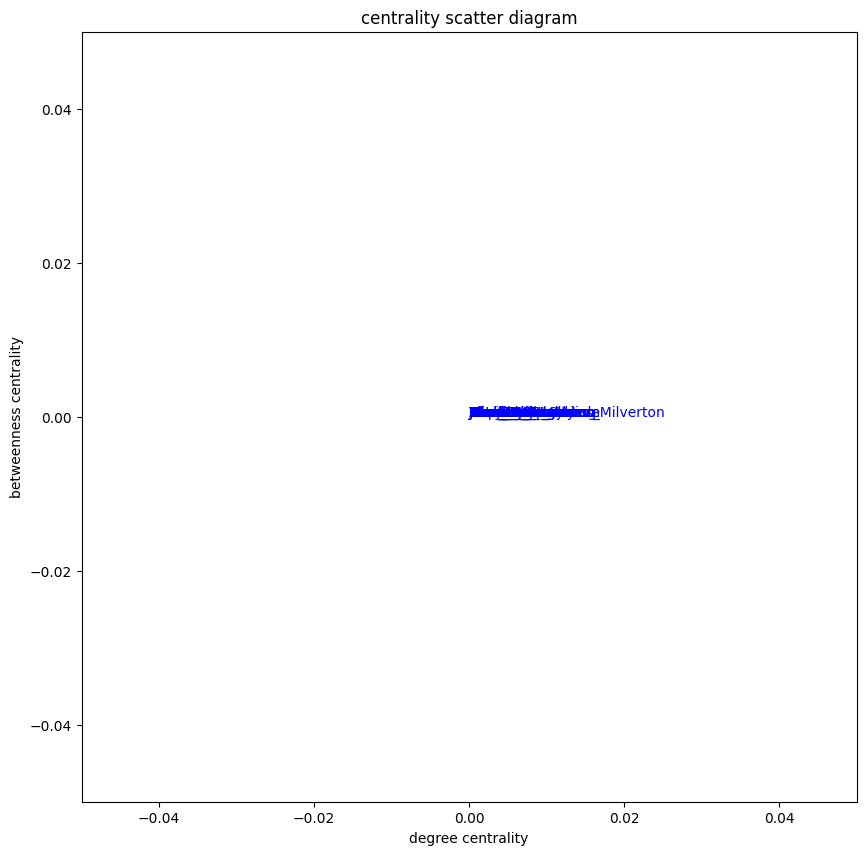

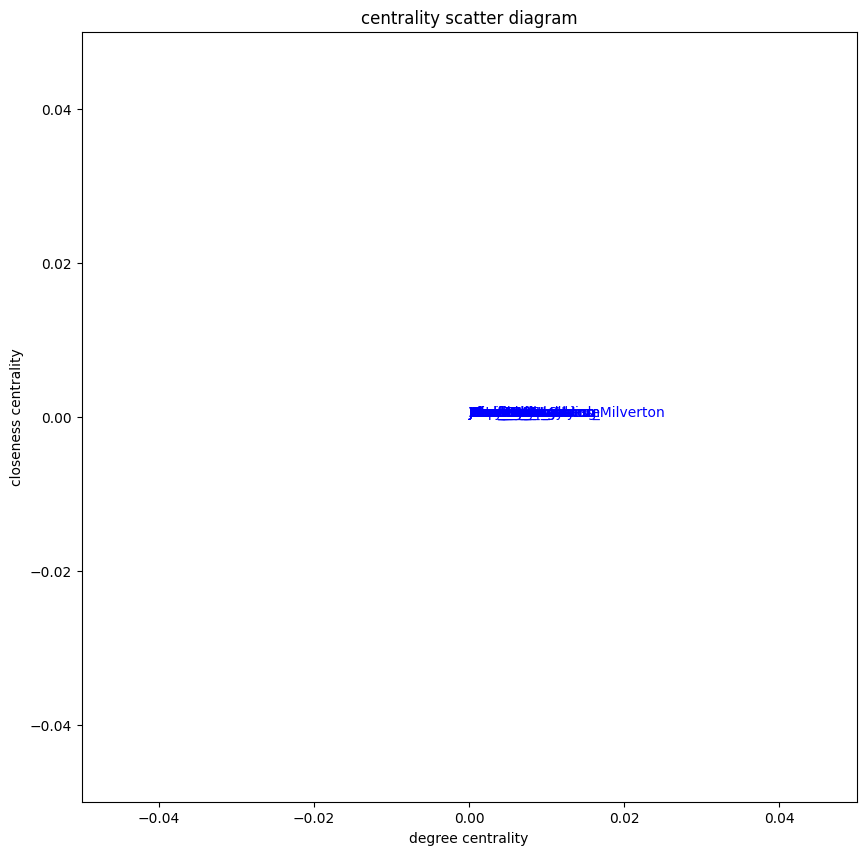

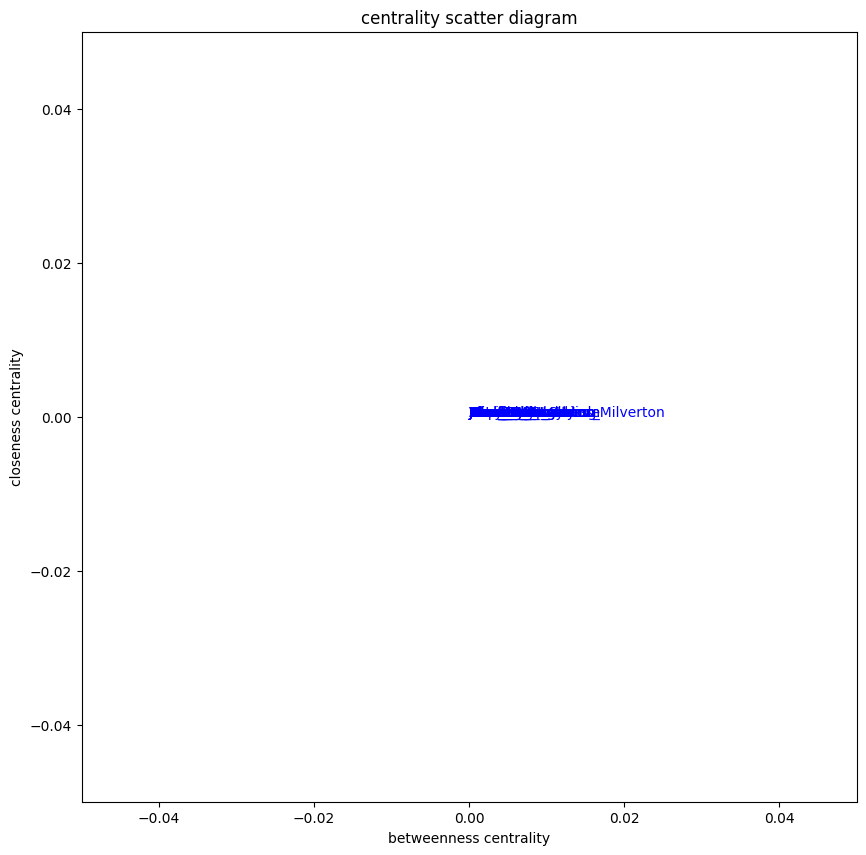

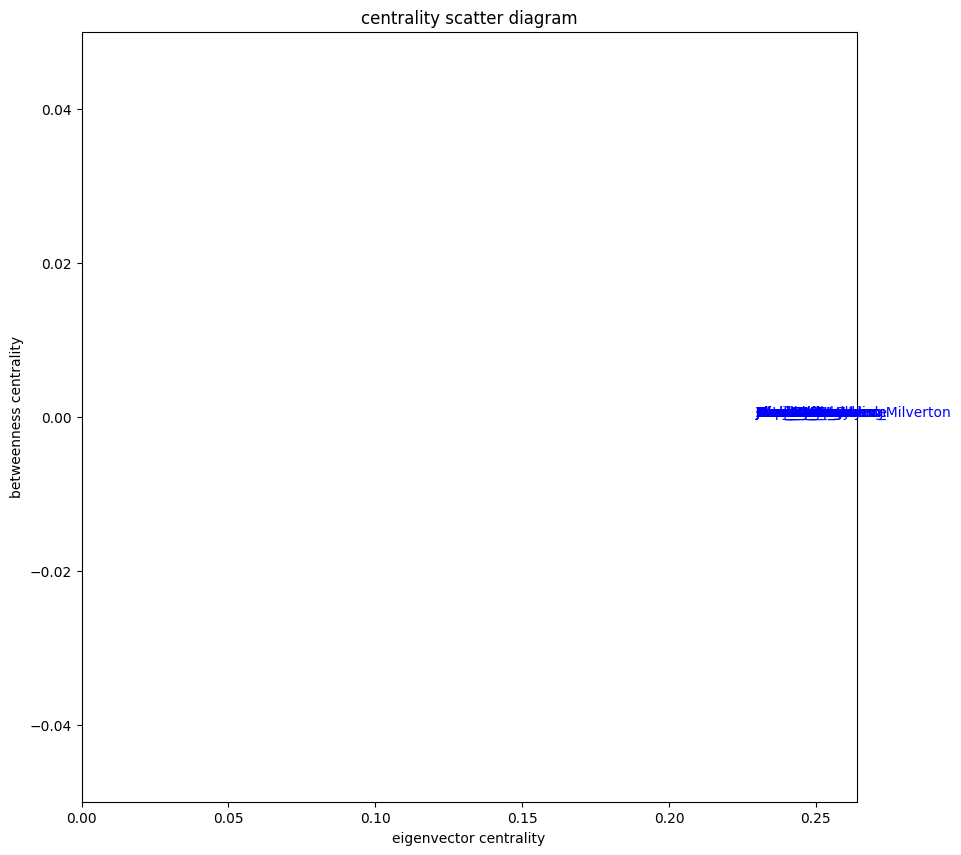

In [55]:
# Draw centrality scatter 
centrality_scatter(dc,bc,path="cum18bcdc",ylab="betweenness centrality",xlab="degree centrality",title="centrality scatter diagram",line=False)
centrality_scatter(dc,cc,path="cum18ccdc",ylab="closeness centrality",xlab="degree centrality",title="centrality scatter diagram",line=False)
centrality_scatter(bc,cc,path="cum18ccbc",ylab="closeness centrality",xlab="betweenness centrality",title="centrality scatter diagram",line=False)
centrality_scatter(ec,bc,path="cum18bcec",ylab="betweenness centrality",xlab="eigenvector centrality",title="centrality scatter diagram",line=False)

In [ ]:
#EGO NETWORK

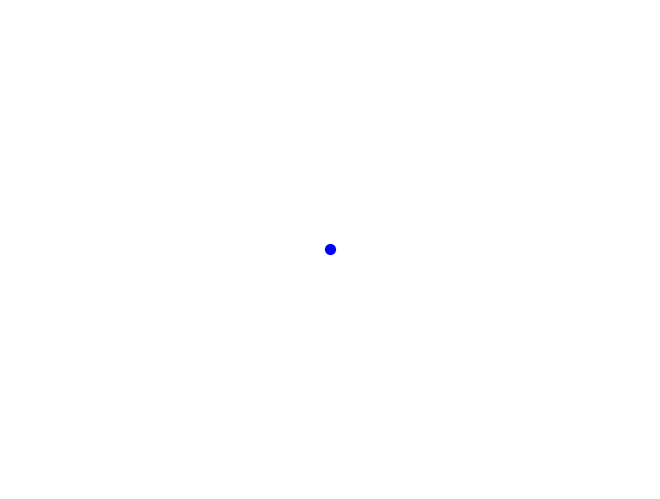

In [56]:
s='Sherlock_Holmes'
#u = unicode(s, "utf-8")
hub_ego=nx.ego_graph(G,s)
# Draw graph
pos=nx.spring_layout(hub_ego)
nx.draw(hub_ego,pos,node_color='b',node_size=50,with_labels=False)
# Draw ego as large and red
#nx.draw_networkx_nodes(hub_ego,pos,with_labels = True,nodelist=[largest_hub],node_size=300,node_color='r')
#plt.savefig('Medici.png')
plt.show()
nx.write_gml(hub_ego,"egonw_paul.gml")

The ego network is esentially the whole graph which shows that the ego i.e. the protagonist is well connected to all the other characters.




Generative models are supposed to have a small average geodesic and our model also has a small average shortest path.

In [ ]:
#CLUSTERING COEFFICIENT

In [57]:
#Local clustering coeff for characters
nx.clustering(G)

{'Sherlock_Holmes': 0,
 'John_Watson': 0,
 'Inspector_Lestrade': 0,
 'Irene_Adler': 0,
 'James_Moriarty': 0,
 'Mary_Morstan': 0,
 'Charles_Augustus_Milverton': 0,
 'Jabez_Wilson': 0,
 'John_Clay': 0,
 'Hosmer_Angel': 0,
 'Count_von_Kramm': 0,
 'John_Turner': 0,
 'Godfrey_Staunton': 0,
 'Neville_St._Clair': 0,
 'Vincent_Spaulding': 0,
 'Windibank': 0,
 'Kate_Whitney': 0,
 'Alice_Turner': 0,
 'Godfrey_Norton': 0}

The main protagonists Paut Atreides and Jessica have relatively low clustering coefficients which signifies that they are central characters.

The characters that have a high clustering coefficent are not central characters.

In [58]:
#COMMUNITIES
from networkx.algorithms.community import k_clique_communities  # find k-clique community using percolation method
c = list(k_clique_communities(G, 9))
print(c)

[]


In [59]:
print(len(list(c)))

0


Community 1 : This community deals with the interaction between Fremen and the House of Atreides.

Community 2 : Atreides and Harkonnens are the two main feuding families and a significant part of the book is dedicated to this rivalry. This community represents the major characters from both the families.



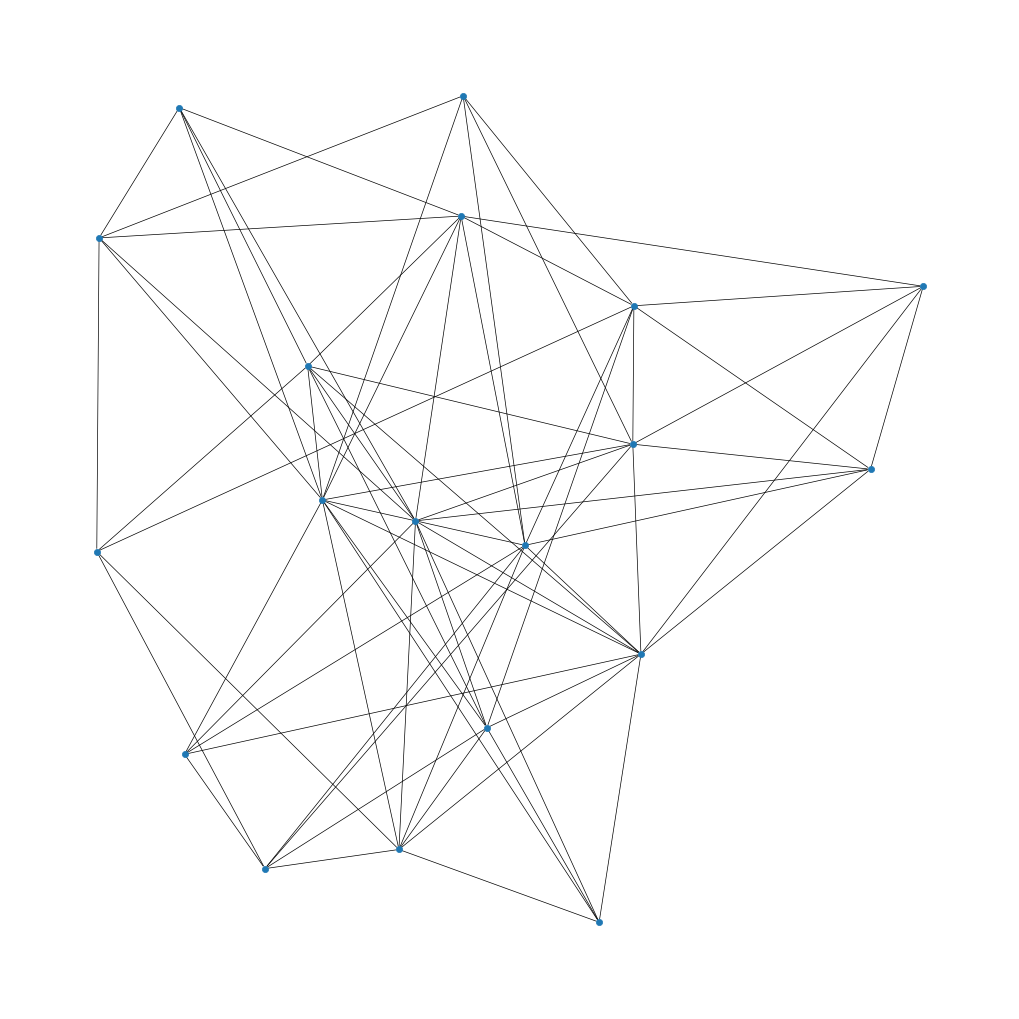

In [60]:
#Generative model
neighbours=5
H = nx.barabasi_albert_graph(no_nodes,neighbours)
fig = plt.figure(figsize =(10 ,10))
nx.draw(H, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5,arrows=True)
plt.show()

We compare our graph with the Preferential Attachment model where the main feature is that nodes tend to get attached to other nodes that have a high degree. This largely follows social networks in real life. This model follows the power law distribution and has a low average shortest path length, but not a high clustering coefficient. Our graph has a low average shortest path length and a high clustering coefficient but it doesn't follow power law distribution and so the graph is partially consistent with this model because characters tend to get connected to our protagonists who play a central role in the story.